C:\Users\Lenovo\AppData\Local\Temp\ipykernel_39916\793041005.py:128: MatplotlibDeprecationWarning: Passing the loc parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  fig.legend((l1, l2, l3), ('S', 'I', 'R'), 'center right')


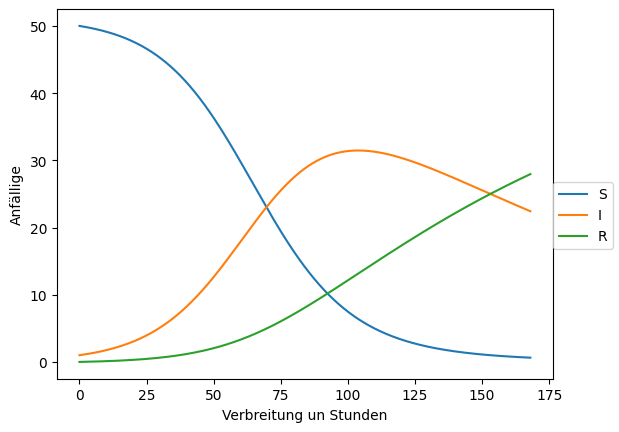

In [13]:

"""
AUTHOREN: HANAN WANDJI DANGA §§ ARIOL TATEPO FABRICE
"""

"""
Ausgangspunkt dieses Projekts ist die Simulation der Ausbreitung von Infektionskrankheiten mit einem mathematischen Modell, 
das wir in [LL20] finden.
wir haben folgende Ausgangspunkte zum Bearbeiten:

 => Abschnitt 8.3 „Spreading of Disease“ ab Seite 225.
 => Die Aufgaben 8.7 „Model an Adaptive Vaccination Campaign“ und 8.8 „Make a SIRV Model with Time-Limited Effect of 
Vaccination“, die Sie ab Seite 274 im Buch finden.

Zielgruppe unserer Projektarbeit sind Studierende im Studiengang Angewandte Informatik im Vertiefungsstudium mit oder keine
Kenntnisse mit der Programmiersprache Python.
"""


"""
Erklärung des Abschnitts 8.3: Spreading of Disease, den wir im folgenden bearbeiten werden


Ziel in diesem Abschnitt ist  zu zeigen, wie man gleichzeitig Mathematik und Programmierung verwenden kann, um ein bestimmtes
Problem zu lösen. Wir werden dies tun, wenn wir die Ausbreitung von Krankheiten untersuchen. Das mathematische Modell ist nun ein
System von drei Differentialgleichungen mit drei unbekannten Funktionen. Um ein solches Modell abzuleiten, können wir vor allem 
auf unsere Intuition zurückgreifen, es ist also kein spezifisches Hintergrundwissen über Krankheiten erforderlich


=> 8.3.1) : Infektion of Flu(eine Infektion der Nase, des Rachens und der Lunge, die Teil des Atmungssystems sind)

Stellen Sie sich ein Internat auf dem Lande vor. Diese Schule ist eine kleine und geschlosseneGesellschaft. Plötzlich 
erkranken einer oder mehrere der Schüler an der Grippe. Wir erwarten, dass sich die Grippe entweder recht effektiv 
ausbreitet oder ausstirbt. Die Frage ist, wie viele der Schüler und der Mitarbeiter der Schule betroffen sein werden.
Einige recht einfache mathematische Berechnungen können uns helfen, Folgendes zu ermitteln einen Einblick in die Dynamik
der Ausbreitung der Krankheit zu bekommen.
Dafür haben wir 3 Funktionen. S(t), I(t) und R(t)

-> S(t) zählt die Anzahl der Personen, die zum Zeitpunkt t die Möglichkeit haben, sich zu infizieren. Hier kann t z. B. Stunden 
oder Tage zählen.
-> Mit I (t) wird gezählt, wie viele der Individuen zum Zeitpunkt t infiziert sind.
-> Wir lassen R(t) die Anzahl der Individuen in der Kategorie R(Entfernen bzw geheilt) zum Zeitpunkt t. D.h sie wechselten von der Infizierten
Kategorie I zu der Kategorie.Bei einer Person, die sich von der Krankheit erholt hat, wird angenommen, dass er immun ist. 
D.h er kann nicht mehr infiziert werden.

Wir können die Mathematik nutzen, um den Austausch zwischen den Kategorien zu beschreiben. Der Grundgedanke besteht darin, die Veränderungen 
zu beschreiben, die innerhalb eines kleinen Zeitintervalls, das mit Δt bezeichnet wird.

Wir führen eine gleichmäßige Masche in der Zeit tn = nΔt, n = 0,...,Nt ein und suchen S an den Maschenpunkten.
Im Zeitintervall Δt wissen wir, dass einige Menschen infiziert sein werden, so dass S abnehmen wird. Wir werden 
bald mathematisch argumentieren, dass es βΔtSI neue infizierte Individuen in diesem Zeitintervall gibt, wobei β 
ein Parameter ist, der angibt, wie leicht Menschen während eines Zeitintervalls von Einheitslänge infiziert werden.
Wenn der Verlust in S βΔtSI beträgt, dann ist die Veränderung von S: Sn+1 − Sn = −βΔtSnI n .

Dividiert man durch Δt und lässt Δt → 0, so nähert sich die linke Seite S'(tn) sodass wir eine Differentialgleichung 
erhalten : S' = -βSI .

Die Wahrscheinlichkeit, dass sich Menschen während einer Zeit T paarweise treffen, ist (nach der empirischen 
Häufigkeitsdefinition der Wahrscheinlichkeit) gleich m/n, d. h. die Anzahl der Erfolge geteilt durch die Anzahl der 
möglichen Ergebnisse. Aus solchen Statistiken aus solchen Statistiken normalerweise Größen ab, die pro Zeiteinheit 
ausgedrückt werden, d. h. wir wollen hier die Wahrscheinlichkeit pro Zeiteinheit, μ, die sich aus der Division durch T 
ergibt: μ = m/(nT ) und ß= pμ . mit p = m/n.


Der Wert von β muss bekannt sein, um mit dem Krankheitsmodell die Zukunft voraussagen zu können Modell vorherzusagen. Eine 
Möglichkeit ist, p und μ anhand ihrer Bedeutung in der obigen Ableitung zu schätzen oben. Alternativ können wir ein 
"Experiment" beobachten, bei dem es zu einem bestimmten Zeitpunkt S0 empfängliche Personen und I0 Infizierte gibt. Während 
eines Zeitintervalls T zählen wir, dass N anfällige Personen infiziert wurden. als grobe Annäherung daran, wie sich S
während der Zeit T entwickelt hat (und nun ist T nicht unbedingt klein, aber wir verwenden trotzdem), erhalten wir:

N = βTS(0)I(0) => ß=N / TS(0)I(0)

Wir haben weiterhin folgende  Formel:

-> I^n+1 − I^n = β.Δt.S^n.I^n − γ.Δt.I^n .
-> R^n+1 − R^n = γ.Δt.I^n .
->(S^n+1 − S^n/ Δt) = −β.S^n.I^n,
->( I^n+1 − I^n /Δt) = β.S^n.I^n − γ.I^n,
->(R^n+1 − R^n/ Δt) = γ.I^n .


Wir haben vor eigene Simulation durchzuführen, um das Verhalten der Infektion zu beschreiben.

Z.B -> wie verbreitet sich die Infektion, wenn sich die Tagen ändern?
-> Wie sieht das aus, wenn der Wert von β oder γ vergrößert bzw verkleinert? usw..



"""


import numpy as np
import matplotlib.pyplot as plt

"""
In unserer Erster Simulation haben wir Folgende Parameter Werte:

N= 10, T= 24, S(0)= 40 und I(0)= 8, β = 10/(40 · 8 · 24) und γ = 3/(15 · 24).

Wendet man diese Parameter auf einen neuen Fall, in dem es anfangs einen Infizierten und 50 Anfällige gibt, 
ergeben sich die Diagramme in die untere Abbildung. Diese Graphen sind nur gerade Linien zwischen den Werten 
zu den Zeitpunkten ti = iΔt, wie sie vom Programm berechnet wurden. Diese Simulation führen wir erstmal 
für 7 Tagen.

"""

# ZeitEinheit: 1 h
beta = 10./(40*8*24)
gamma = 3./(15*24)
dt = 0.1 # 6 min <=> 60 min =1
D = 7 # Simulation für D Tagen
N_t = int(D*24/dt) #Entsprechende Anzahl von Zeitschritten
t = np.linspace(0, N_t*dt, N_t+1)
S = np.zeros(N_t+1)
I = np.zeros(N_t+1)
R = np.zeros(N_t+1)
# Anfang Bedingungen
S[0] = 50
I[0] = 1
R[0] = 0
# Schrittgleichungen in der Zeit vorwärts
for n in range(N_t):
    S[n+1] = S[n] - dt*beta*S[n]*I[n]
    I[n+1] = I[n] + dt*beta*S[n]*I[n] - dt*gamma*I[n]
    R[n+1] = R[n] + dt*gamma*I[n]
    
fig = plt.figure()
l1, l2, l3 = plt.plot(t, S, t, I, t, R)
fig.legend((l1, l2, l3), ('S', 'I', 'R'), 'center right')
plt.xlabel('Verbreitung un Stunden')
plt.ylabel('Anfällige')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10576\1618280716.py:62: MatplotlibDeprecationWarning: Passing the loc parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  fig.legend((l1, l2, l3), ('S', 'I', 'R'), 'center right')


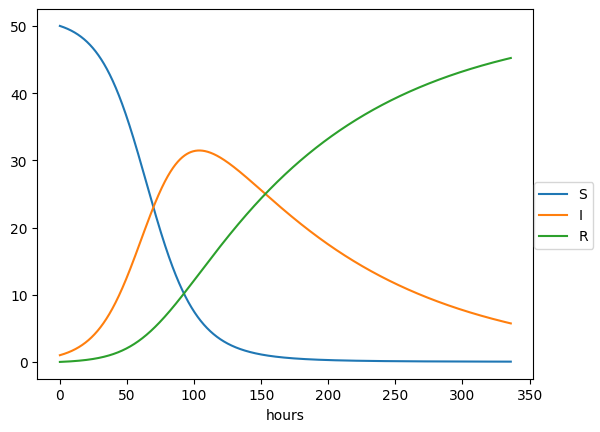

In [14]:
"""
===================================INTERPRETATION DES ERSTEN GRAPHS==========================================

Nach 7 Tagen ist zu beochbachten, dass während sich die Zahl der Anfällige(S) reduziert, vergrößern sich die Zahl der
Infizierten(I)  und die Zahl der geheilt (R).
Die Anfangsbedingungen sind:
S[0]= 50, I[0]= 1 und R[0]=0

Nach ungefähr 70 Stunden d.h 2,92 Tagen kreuzen sich die Kurven von S und I. D.h zu diesem Zeitpunkt gibt es genauso
Anfällige wie Personen die infiziert sind. und das Entspricht ungefähr  S=22 und I= 22. => R= 51- (S + R) = 51-(22+ 22)=7.
Nach 2,92 Tagen haben wir : 22/51= 0.43 Prozent Infizierten, 0.43 Anfällige und 0.14 geheilt.

Nach ungefähr 90 Stunden d.h 3,75 Tagen kreuzen sich die Kurven von S und R mit folgenden Bedingungen:
S = 10 Anfällige, R= 10 geheilt und I= 51- 20= 31 Infizierten
Nach 3,75 Tagen haben Wir : 31/51=0.61 Prozent Infizierten, 0.195 Prozent von Anfälligen und geheilt

Nach mehr als 150 hours= 6,25 Tagen beginnt die Kurven von I(Infizierten) zu senken und die kreuzt sich mit der Kurve von R unter der folgenden
Bedingungen:
I=R= 25 und S= 1. Nach 6,25 Tagen haben wir fast 50 Prozent geheilt und es bleibt auch fast 50 Prozent infiziert.

Nach 6,25 - 3,75= 2,5 Tagen sind 31- 25 = 6 Personen geheilt geworden. D.h die Prozentheilung Pro Tag bis jetzt beträgt:

6/2.5= 2,4 Personen werden Pro Tag geheilt
Daraus folgt wir brauchen 51/2.4=21.25 Tagen um 51 Personen wieder Gesund zu kriegen

Nach 2,92-0= 2,92Tagen Bleiben nur 22 von 50 am Anfang mögliche Anfällige= 0.43 prozent und es gibt 21 neue Infizierten
d.h es gibt (21/2,92)= 7.2 Infizierten pro Tag.



"""



"""
Im Zweiten Graph wollen wir die Simulation auf 14 Tagen durchführen, d.h zwei Mal mehr als die erste Simulation
"""


# ZeitEinheit: 1 h
beta = 10./(40*8*24)
gamma = 3./(15*24)
dt = 0.1 # 6 min
D = 14 # Simulation für D Tagen
N_t = int(D*24/dt) # Entsprechende Anzahl von Stunden
t = np.linspace(0, N_t*dt, N_t+1)
S = np.zeros(N_t+1)
I = np.zeros(N_t+1)
R = np.zeros(N_t+1)
# Anfang Bedingungen
S[0] = 50
I[0] = 1
R[0] = 0
#  Schrittgleichungen in der Zeit vorwärts
for n in range(N_t):
    S[n+1] = S[n] - dt*beta*S[n]*I[n]
    I[n+1] = I[n] + dt*beta*S[n]*I[n] - dt*gamma*I[n]
    R[n+1] = R[n] + dt*gamma*I[n]
    
fig = plt.figure()
l1, l2, l3 = plt.plot(t, S, t, I, t, R)
fig.legend((l1, l2, l3), ('S', 'I', 'R'), 'center right')
plt.xlabel('Verbreitung un Stunden')
plt.ylabel('Anfällige')
plt.savefig('tmp.pdf'); plt.savefig('tmp.png')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10576\3998218455.py:37: MatplotlibDeprecationWarning: Passing the loc parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  fig.legend((l1, l2, l3), ('S', 'I', 'R'), 'center right')


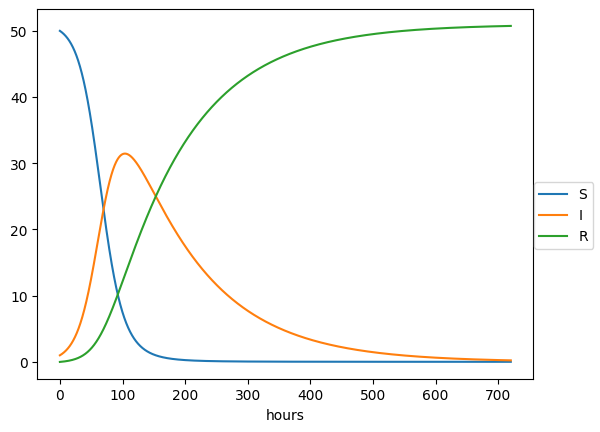

In [16]:
"""
===================================INTERPRETATION DES ZWEITEN GRAPHS==========================================

Nach 14 Tagen ändern sich die Beobachtungen des ersten Diagramms nicht . Deutlich erkennbar, ist dass sich die Zahl der Infizierten
nach 150 Stunden und Anfälligen deutlich reduzieren , während sich die Zahl der "geheilt" vergößert


"""






# ZeitEinheit: 1 h
beta = 10./(40*8*24)
gamma = 3./(15*24)
dt = 0.1 # 6 min
D = 30 # Simulation für D Tagen
N_t = int(D*24/dt) # Corresponding no of time steps
t = np.linspace(0, N_t*dt, N_t+1)
S = np.zeros(N_t+1)
I = np.zeros(N_t+1)
R = np.zeros(N_t+1)
# Anfang Bedingungen
S[0] = 50
I[0] = 1
R[0] = 0
# # Schrittgleichungen in der Zeit vorwärts
for n in range(N_t):
    S[n+1] = S[n] - dt*beta*S[n]*I[n]
    I[n+1] = I[n] + dt*beta*S[n]*I[n] - dt*gamma*I[n]
    R[n+1] = R[n] + dt*gamma*I[n]
    
fig = plt.figure()
l1, l2, l3 = plt.plot(t, S, t, I, t, R)
fig.legend((l1, l2, l3), ('S', 'I', 'R'), 'center right')
plt.xlabel('Verbreitung un Stunden')
plt.ylabel('Anfällige')
plt.savefig('tmp.pdf'); plt.savefig('tmp.png')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10576\1717980159.py:50: MatplotlibDeprecationWarning: Passing the loc parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  fig.legend((l1, l2, l3), ('S', 'I', 'R'), 'center right')


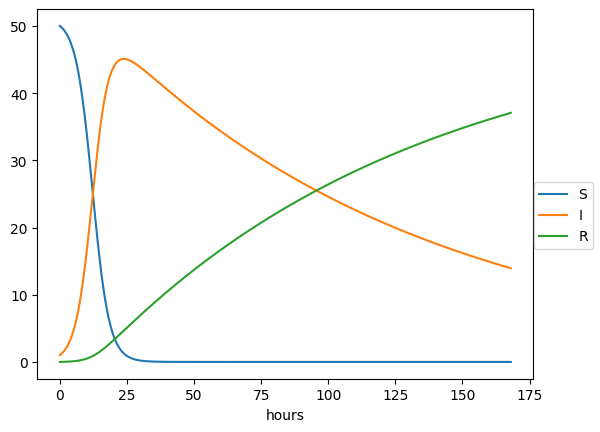

In [20]:
"""
===================================INTERPRETATION DES DRITTEN GRAPHS==========================================
Unserer Dritter Graph beschreibt genau, was wir im ersten Graph  vorhergesagt haben.Das Verhalten der Kurven hat sich 
wirklich nicht verändert. Die Kurve der Infizierten(I) fällt ab 150 Stunden ab, ebenso wie die der wahrscheinlich Infizierten(S).
Die Kurve der Ansteckenden geht nach mehr als 25 Tagen gegen 0, während die Kurve der Geheilten(R) nach 25 Tagen gegen unendlich.
geht. Das bedeutet, dass mit zunehmender Zeit(Tagen), immer mehr Menschen gesund werden(R) und die Zahl derer, die wahrscheinlich 
infiziert werden(S), abnimmt. Wenn wir weiterhin die Anzahl von Tagen vergrößern, wird das Diagramm unübersichtlich. Bestimmt bis
jetzt ist dann:
Die Prozentheilung : 2,4 Personen werden Pro Tag geheilt , und Infektionsprozent: 7,2 Infizierten pro Tag. Egal wie groß die Zahl von 
Personen ist, können wir bestimmen in wieviel Tagen, Sie geheilt bzw infiziert werden können. Wichtig jetzt ist zu wissen, welcher 
Einfluss die Faktoren Beta und gamma auf die Infektionsverbreitung haben.



In unserer nächsten Simulation werden wir versuchen, das Verhalten der Infektionen in Abhängigkeit von dem Wert von Beta(ein 
Parameter, der angibt, wie leicht Menschen während eines Zeitintervalls von Einheitslänge infiziert werden) zu beschreiben.
In erster Linie vergrößern wir erstmal den Wert von Beta um 5 mal. D.h neue Beta = 5. alte Beta

Wir haben dann folgende Parameter Werte:

N= 50 anstatt von 10, T= 24, S(0)= 40 und I(0)= 8, β = 50/(40 · 8 · 24) und γ = 3/(15 · 24).

"""




# ZeitEinheit: 1 h
beta = 50./(40*8*24)
gamma = 3./(15*24)
dt = 0.1 # 6 min
D = 7 # Simulation für D Tagen
N_t = int(D*24/dt) # Corresponding no of time steps
t = np.linspace(0, N_t*dt, N_t+1)
S = np.zeros(N_t+1)
I = np.zeros(N_t+1)
R = np.zeros(N_t+1)
# Anfang Bedingungen
S[0] = 50
I[0] = 1
R[0] = 0
#  Schrittgleichungen in der Zeit vorwärts
for n in range(N_t):
    S[n+1] = S[n] - dt*beta*S[n]*I[n]
    I[n+1] = I[n] + dt*beta*S[n]*I[n] - dt*gamma*I[n]
    R[n+1] = R[n] + dt*gamma*I[n]
    
fig = plt.figure()
l1, l2, l3 = plt.plot(t, S, t, I, t, R)
fig.legend((l1, l2, l3), ('S', 'I', 'R'), 'center right')
plt.xlabel('Verbreitung un Stunden')
plt.ylabel('Anfällige')
plt.savefig('tmp.pdf'); plt.savefig('tmp.png')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10576\3142980359.py:67: MatplotlibDeprecationWarning: Passing the loc parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  fig.legend((l1, l2, l3), ('S', 'I', 'R'), 'center right')


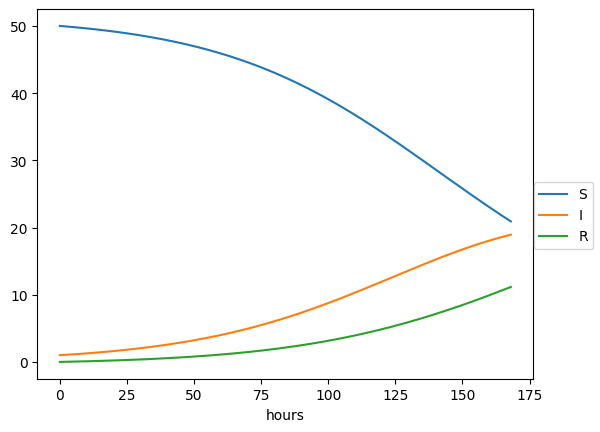

In [22]:
"""
===================================INTERPRETATION DES VIERTEN GRAPHS==========================================
Zu beochbachten ist, dass während sich die Zahl der Anfällige(S) reduziert, vergrößern sich die Zahl der
Infizierten(I)  und die Zahl der geheilt (R).
Die Anfangsbedingungen sind:
S[0]= 50, I[0]= 1 und R[0]=0

Nach ungefähr 12,5 Stunden d.h 0,5 Tagen kreuzen sich die Kurven von S und I. D.h zu diesem Zeitpunkt gibt es genauso
Anfällige wie Personen die infiziert sind. und das Entspricht ungefähr  S=25 und I= 25. => R= 51- (S + R) = 51-(25+ 25)=1.
Nach 0,5 Tagen haben wir : 25/51= 0.49 Prozent Infizierten, 0.49 Anfällige und 0.02 geheilt.

Nach ungefähr 20 Stunden d.h 0,833 Tagen kreuzen sich die Kurven von S und R mit folgenden Bedingungen:
S = 3 Anfällige, R=3 geheilt und I= 51-6= 45 Infizierten
Nach 0,83 Tagen haben Wir : 45/51=0.88 Prozent Infizierten, 0.06 Prozent von Anfälligen und geheilt

 
Nach nur 25 Stunden geht die Kurve von S(Anfällige) gegen null, dh die Infektion wurde Komplett verbreitet.

Nach mehr als 95 hours= 3,95 Tagen kreuzt sich die Kurve von I(Infizierten)  mit der Kurve von R unter der folgenden
Bedingungen:
I=R= 25,5 und S= 0. Nach 3,95 Tagen haben wir  50 Prozent geheilt und es bleibt auch  50 Prozent infiziert. Es gibt keine 
Anfällige mehr.

Nach 0,83 - 0,5= 0,33 Tagen sind 3- 1 = 2 Personen geheilt geworden. D.h die Prozentheilung Pro Tag bis jetzt beträgt:

2/0,33= 6,06 Personen werden Pro Tag geheilt
Daraus folgt wir brauchen 51/6.06=841 Tagen um 51 Personen wieder Gesund zu kriegen
Folgerung: Multipliziert man Beta mal 5 dann wird man (6.06/2.4)= 2,97 mal schneller gesund.

Nach 0,83-0= 0,83 Tagen Bleiben nur 3 von 50 am Anfang mögliche Anfällige= 0.06 prozent und es gibt 44 neue Infizierten
d.h es gibt (44/0,83)= 53.01 Infizierten pro Tag. Die Verbreitung geht schneller als es personen gibt pro Tag
53,01/ 7.2= 7,36 mal mehr als früher.

Folgerung: Multipliziert man Beta mal 5 dann verbreitet sich die Infektion 7,36 mal schneller

===SCHLUSSFOLGERUNG=== : Je höher Beta wird desto schneller verbreitet sich die Infektion und desto schneller auch
kriegt man die Gesundheit

"""

"""
In dieser Simulation wollen wir bestimmen, wie Die Infektionsverbreitung aussehen wird, wenn sich Beta reduziert.
In erster Linie reduzieren wir erstmal den Wert von Beta um 2 mal. D.h neue Beta = (1/2). alte Beta

Wir haben dann folgende Parameter Werte:

N= 5 anstatt von 10, T= 24, S(0)= 40 und I(0)= 8, β = 5/(40 · 8 · 24) und γ = 3/(15 · 24). für 7 Tagen
"""

# ZeitEinheit: 1 h
beta = 5./(40*8*24)
gamma = 3./(15*24)
dt = 0.1 # 6 min
D = 7 # Simulation für D Tagen
N_t = int(D*24/dt) # Entsprechende Anzahl von Stunden
t = np.linspace(0, N_t*dt, N_t+1)
S = np.zeros(N_t+1)
I = np.zeros(N_t+1)
R = np.zeros(N_t+1)
# Anfang Bedingungen
S[0] = 50
I[0] = 1
R[0] = 0
# Schrittgleichungen in der Zeit vorwärts
for n in range(N_t):
    S[n+1] = S[n] - dt*beta*S[n]*I[n]
    I[n+1] = I[n] + dt*beta*S[n]*I[n] - dt*gamma*I[n]
    R[n+1] = R[n] + dt*gamma*I[n]
    
fig = plt.figure()
l1, l2, l3 = plt.plot(t, S, t, I, t, R)
fig.legend((l1, l2, l3), ('S', 'I', 'R'), 'center right')
plt.xlabel('Verbreitung un Stunden')
plt.ylabel('Anfällige')
plt.savefig('tmp.pdf'); plt.savefig('tmp.png')
plt.show()




C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10576\2311742238.py:23: MatplotlibDeprecationWarning: Passing the loc parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  fig.legend((l1, l2, l3), ('S', 'I', 'R'), 'center right')


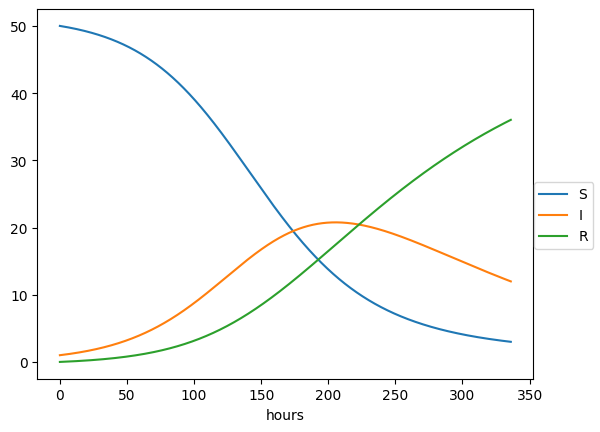

In [24]:

"""
===================================INTERPRETATION DES FUENFTEN GRAPHS==========================================
Zu beochbachten ist, dass während sich die Zahl der Anfällige(S) reduziert, vergrößern sich die Zahl der
Infizierten(I)  und die Zahl der geheilt (R).
Die Anfangsbedingungen sind:
S[0]= 50, I[0]= 1 und R[0]=0

Bemekenswert ist, dass nach mehr als 170 Stunden das Verhalten gleich wie früher  ist,  aber es gibt keine Kreuzung 
zwischen den Kurven nach 7 Tagen.

"""

"""
 Im folgenden Graph steht die Simulation nach 14 Tagen mit Beta reduziert um 2 mal

"""
# ZeitEinheit: 1 h
beta = 5./(40*8*24)
gamma = 3./(15*24)
dt = 0.1 # 6 min
D = 14 # Entsprechende Anzahl von Stunden
N_t = int(D*24/dt) # Corresponding no of time steps
t = np.linspace(0, N_t*dt, N_t+1)
S = np.zeros(N_t+1)
I = np.zeros(N_t+1)
R = np.zeros(N_t+1)
# Anfang Bedingungen
S[0] = 50
I[0] = 1
R[0] = 0
# Schrittgleichungen in der Zeit vorwärts
for n in range(N_t):
    S[n+1] = S[n] - dt*beta*S[n]*I[n]
    I[n+1] = I[n] + dt*beta*S[n]*I[n] - dt*gamma*I[n]
    R[n+1] = R[n] + dt*gamma*I[n]
    
fig = plt.figure()
l1, l2, l3 = plt.plot(t, S, t, I, t, R)
fig.legend((l1, l2, l3), ('S', 'I', 'R'), 'center right')
plt.xlabel('Verbreitung un Stunden')
plt.ylabel('Anfällige')
plt.savefig('tmp.pdf'); plt.savefig('tmp.png')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10576\3652296700.py:63: MatplotlibDeprecationWarning: Passing the loc parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  fig.legend((l1, l2, l3), ('S', 'I', 'R'), 'center right')


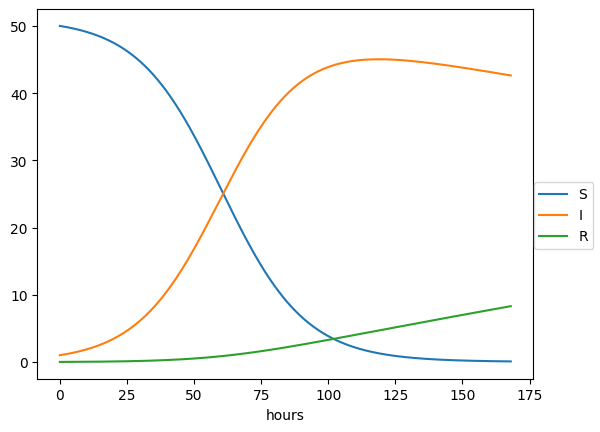

In [28]:
"""
===================================INTERPRETATION DES SECHSTEN GRAPHS==========================================


Nach ungefähr 175 Stunden d.h 7,29 Tagen kreuzen sich die Kurven von S und I. D.h zu diesem Zeitpunkt gibt es genauso
Anfällige wie Personen die infiziert sind. und das Entspricht ungefähr  S=19 und I= 19. => R= 51- (S + R) = 51-(19+ 19)=13.
Nach 7,29 Tagen haben wir : 19/51= 0.37 Prozent Infizierten, 0.37 Anfällige und 0.26 geheilt.

Nach ungefähr 190 Stunden d.h 7,92 Tagen kreuzen sich die Kurven von S und R mit folgenden Bedingungen:
S = 15 Anfällige, R= 15 geheilt und I= 51- 30= 21 Infizierten
Nach 7,92 Tagen haben Wir : 21/51=0.41 Prozent Infizierten, 0.295 Prozent von Anfälligen und geheilt

Nach mehr als 220 Stunden= 9,2 Tagen kreuzt sich die Kurven von I(Infizierten)  mit der Kurve von R unter der folgenden
Bedingungen:
I=R= 19 und S= 13. Nach 9,2 Tagen haben wir fast 37,3 Prozent geheilt und es bleibt auch fast 37,3 Prozent infiziert.

Nach 9,2 - 7,92= 1,28 Tagen sind 19-15 = 4 Personen geheilt geworden. D.h die Prozentheilung Pro Tag bis jetzt beträgt:

4/1.28= 3,125 Personen werden Pro Tag geheilt
Daraus folgt wir brauchen 51/1,28=39.84 Tagen um 51 Personen wieder Gesund zu kriegen

Nach 7,92-0= 7,92 Tagen Bleiben nur 15 von 50 am Anfang mögliche Anfällige= 0.3 prozent und es gibt 21 neue Infizierten
d.h es gibt (21/7,92)= 2,65 Infizierten pro Tag.

Wenn sich Beta um 2 reduziert, brauchen wir  (39.84/21.25) =1,87 Tagen mehr, um die Personen wieder gesund zu kriegen
und die Infektionsverbreitung reduziert sich auch um (7.2/ 2.65)= 2.71.
"""


"""
In dieser Simulation wollen wir bestimmen, wie Die Infektionsverbreitung aussehen wird, wenn sich gamma ändert.
In erster Linie reduzieren wir erstmal den Wert von gamma um 5 mal. D.h neue gamma = (1/5). alte gamma

Wir haben dann folgende Parameter Werte:

N= 10 , T= 24, S(0)= 40 und I(0)= 8, β = 10/(40 · 8 · 24) und γ = (3/5)/(15 · 24). für 7 Tagen


"""

# ZeitEinheit: 1 h
beta = 10./(40*8*24)
gamma = (3/5)/(15*24)
dt = 0.1 # 6 min
D = 7 # Simulation für D Tagen
N_t = int(D*24/dt) # Entsprechende Anzahl von Stunden
t = np.linspace(0, N_t*dt, N_t+1)
S = np.zeros(N_t+1)
I = np.zeros(N_t+1)
R = np.zeros(N_t+1)
# Anfang Bedingungen
S[0] = 50
I[0] = 1
R[0] = 0
# Schrittgleichungen in der Zeit vorwärts
for n in range(N_t):
    S[n+1] = S[n] - dt*beta*S[n]*I[n]
    I[n+1] = I[n] + dt*beta*S[n]*I[n] - dt*gamma*I[n]
    R[n+1] = R[n] + dt*gamma*I[n]
    
fig = plt.figure()
l1, l2, l3 = plt.plot(t, S, t, I, t, R)
fig.legend((l1, l2, l3), ('S', 'I', 'R'), 'center right')
plt.xlabel('Verbreitung un Stunden')
plt.ylabel('Anfällige')
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10576\1335753608.py:43: MatplotlibDeprecationWarning: Passing the loc parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  fig.legend((l1, l2, l3), ('S', 'I', 'R'), 'center right')


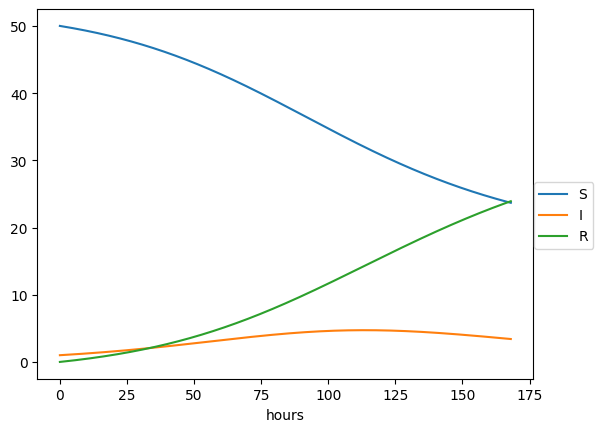

In [27]:
"""
===================================INTERPRETATION DES SIEBTEN GRAPHS==========================================
 Wenn man Gamma um ein Fünftel reduziert. Dies hat keine allzu großen Auswirkungen auf das Zusammentreffen der Kurven
 der möglichen Infizierten(S) und der Infizierten (I). Die Kurven S und R treffen sich jedoch viel später, nämlich 102 
 Stunden statt 90 Stunden wie zuvor. Auch das Zusammentreffen der Kurven I und R (immune Personen) ist viel später. 
 Die Gamma-Reduktion hat keinen großen Einfluss auf die Entwicklung des Virus, sondern eher auf die Heilung der Menschen.
 D.h: Die Verbreitung des Virus ist fast gleich, aber die Heilung der Menschen dauert deutlich länger.
"""


"""
In dieser Simulation wollen wir bestimmen, wie Die Infektionsverbreitung aussehen wird, wenn sich gamma ändert.
Dieses Mal vergrößern wir  den Wert von gamma um 5 mal. D.h neue gamma = 5. alte gamma

Wir haben dann folgende Parameter Werte:

N= 10 , T= 24, S(0)= 40 und I(0)= 8, β = 10/(40 · 8 · 24) und γ = (5*3)/(15 · 24). für 7 Tagen



"""
# ZeitEinheit: 1 h
beta = 10./(40*8*24)
gamma = (5* 3)/(15*24)
dt = 0.1 # 6 min
D = 7 # Simulation für D Tagen
N_t = int(D*24/dt) # Entsprechende Anzahl von Stunden
t = np.linspace(0, N_t*dt, N_t+1)
S = np.zeros(N_t+1)
I = np.zeros(N_t+1)
R = np.zeros(N_t+1)
# Anfang Bedingungen
S[0] = 50
I[0] = 1
R[0] = 0
# Schrittgleichungen in der Zeit vorwärts
for n in range(N_t):
    S[n+1] = S[n] - dt*beta*S[n]*I[n]
    I[n+1] = I[n] + dt*beta*S[n]*I[n] - dt*gamma*I[n]
    R[n+1] = R[n] + dt*gamma*I[n]
    
fig = plt.figure()
l1, l2, l3 = plt.plot(t, S, t, I, t, R)
fig.legend((l1, l2, l3), ('S', 'I', 'R'), 'center right')
plt.xlabel('Verbreitung un Stunden')
plt.ylabel('Anfällige')
plt.show()



beta: 0.00033


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_39916\779828967.py:76: MatplotlibDeprecationWarning: Passing the loc parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  fig.legend((l1, l2, l3, l4), ('S', 'I', 'R', 'V'), 'upper right')


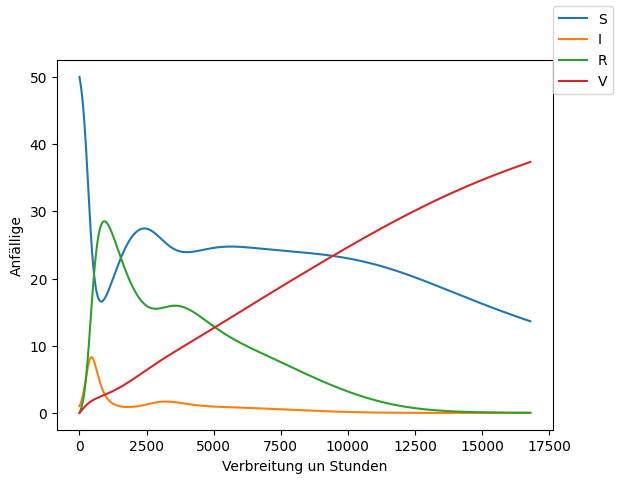

In [9]:
"""
===================================INTERPRETATION DES ACHTEN GRAPHS==========================================
Wenn man Gamma um das Fünffache seines Ausgangswertes erhöht, stellt man fest, dass es kaum noch Infektionen gibt.
Die Kurve der immunen Personen (R) steigt an, die der wahrscheinlichen Personen für eine Infektion (S) sinkt. 
Dennoch dauert es viel länger, bis alle Personen, die eine Infektion riskieren, geheilt sind.


=============SCHLUSSFOLGERUNG========

Um eine optimale Heilung der Infizierten(R) und eine langsame Ausbreitung des Virus(I) zu erreichen, 
muss die folgende Bedingung erfüllt sein: (Beta * S) > Gamma 

"""

"""
===============================Einbezug von Impfungen===========================================

Wir können das Modell so erweitern, dass es auch Impfungen berücksichtigt. Zu diesem Zweck kann es sinnvoll sein
diejenigen zu verfolgen, die geimpft sind und diejenigen, die nicht geimpft sind. Wir führen also eine vierte
Kategorie, V, für diejenigen ein, die sich erfolgreich haben impfen lassen. Außerdem nehmen wir, dass in einem 
Zeitintervall Δt ein Teil pΔt der Kategorie S , dass in einem Zeitintervall Δt ein Teil pΔt der Kategorie S eine
erfolgreich geimpft wird. Das bedeutet, dass in der Zeit Δt pΔtS Personen von der S in die V-Kategorie. Da die 
Geimpften die Krankheit nicht bekommen können, gibt es keine Auswirkungen auf die Kategorien I oder R. Wir können 
die Kategorien und die Bewegung visualisieren zwischen ihnen

Die neuen Formeln sind nun:

S = −β*S*I + ν*R − p*S, (8.36)
V = p*S, (8.37)
I = β*S*I − γ*I, (8.38)
R = γ*I − ν*R 
V^n+1 = V^n + p*Δt*S^n
Das Programm muss V (t) in einem zusätzlichen Array V speichern, und der Plot-Befehl muss um weitere Argumente erweitert 
werden, um auch V gegen t darzustellen, Bei der Verwendung von p = 0,0001 und p = 0,001 als Werte für die Impfstoffeffizienz 
Parameter

"""

import numpy as np
import matplotlib.pyplot as plt

# ZeitEinheit: 1 h
beta = 10./(40*8*24)
beta = beta=0.00033  
print('beta:', beta)
gamma = 3./(15*24)
dt = 0.1             # 6 min
D = 700              # Simulation für D Tagen
N_t = int(D*24/dt)   # Entsprechende Anzahl von Stunden
nu = 1./(24*50)      # Durchschnittlicher Verlust der Immunität: 50 Tage

p = 0.0001

t = np.linspace(0, N_t*dt, N_t+1)
S = np.zeros(N_t+1)
I = np.zeros(N_t+1)
R = np.zeros(N_t+1)
V = np.zeros(N_t+1) # V hinzugefügt für die geimpften Personen

# Anfang Bedingungen
S[0] = 50
I[0] = 1
R[0] = 0
V[0] = 0

# Schrittgleichungen in der Zeit vorwärts
for n in range(N_t):
    S[n+1] = S[n] - dt*beta*S[n]*I[n] + dt*nu*R[n] - dt*p*S[n]
    V[n+1] = V[n] + dt*p*S[n]
    I[n+1] = I[n] + dt*beta*S[n]*I[n] - dt*gamma*I[n]
    R[n+1] = R[n] + dt*gamma*I[n] - dt*nu*R[n]
    

fig = plt.figure()
l1, l2, l3, l4 = plt.plot(t, S, t, I, t, R, t, V)
fig.legend((l1, l2, l3, l4), ('S', 'I', 'R', 'V'), 'upper right')
plt.xlabel('Verbreitung un Stunden')
plt.ylabel('Anfällige')
plt.savefig('tmp.pdf')
plt.show()

beta: 0.00033


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_39916\1252929474.py:76: MatplotlibDeprecationWarning: Passing the loc parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  fig.legend((l1, l2, l3, l4), ('S', 'I', 'R', 'V'), 'upper right')


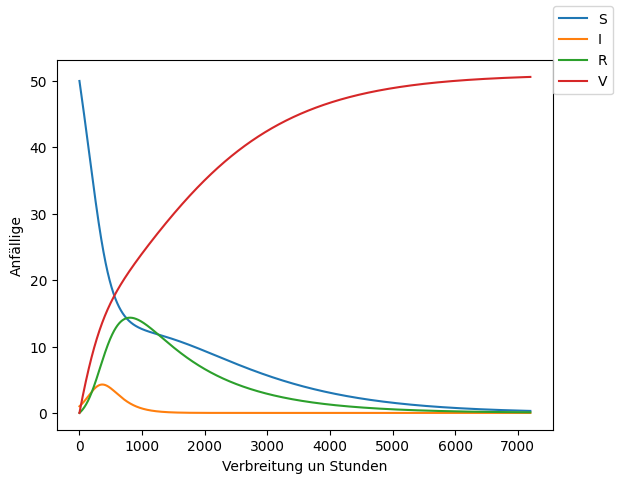

In [10]:
"""
===================================INTERPRETATION DES NEUNTEN GRAPHS mit (p=0,0001) ==========================================
mit p(Impfstoffeffizienz)=0,0001 ist es festzulegen, dass sich nur nach ungefähr 9000 Stunden = 375 Tagen = Ein Jahr 10 Tagen
die Kurven von V(geimpften) und S(mögliche Anfälligen) überschneiden. D.h Mit einer Impstoffeffizienz von 1/10000 braucht man ein 
Jahr 10 Tagen, damit die Anfällige Quote kleiner als die geimpften Quote ist.
Wir haben weitere folgenden Überschneidungen:

=> mit t=0 überschneiden sich die Kurven von R(), V() und I(). Die Kurve von I geht bis maximal 8(Personen), und beginnt schon
nach ungefähr 200 Stunden=  8,33 Tagen gegen null zu konvergieren.
=> Die Kurven von S() und R() überschneiden sich zwei mal: mit t=250 Stunden, R= 20 und t= 2000 Stunden und R= 23.
D.h zwischen 20 <= t <=2000 schwanken die Kurven von S() und R(). Sie steigen und sinken.Früher war das nicht der Fall. Man 
kann daraus folgen, dass p(Impfstoffeffizienz) einen Einfluss auf die Evolution der Kurven hat.

Zu Bemerken ist auch, dass die Krankheit maximal 8 von möglichen 50 Anfälligen gefangen hat. D.h der Virus hat nur 8/50 =16 Prozent
Chance die Personen zu infizieren.
Dagegen ist auch zu beobachten, dass auch nach 17500 Stunden die Anzahl von möglichen Anfälligen immer groß (15) ist.
Die Gefahr die Krankheit zu gefangen ist eher Klein 16 Prozent, aber nach 730 Tagen fast zwei Jahren können noch 
15/50 =0.3=30 Prozent der Bevölkerung die Krankheit gefangen. Der Parameter p hat verhindert zwar die Evolution der Infektion
aber die Leute bleiben noch im Gefahr nach 2 Jahren.

"""

"""
Im zehnten Graph multiplizieren wir den Wert von p=0.0001 mal 10. Dh p=alte p* 10= 0.0001*10= 0.001
Wir wollen hier überprüfen, ob eine bessere Impfstoff Effizienz, dazu bringen kann, dass die möglichen Anfälligen sehr früh gegen
null konvergieren

"""

import numpy as np
import matplotlib.pyplot as plt

# ZeitEinheit: 1 h
beta = 10./(40*8*24)
beta = beta=0.00033  
print('beta:', beta)
gamma = 3./(15*24)
dt = 0.1             # 6 min
D = 300              # Simulation für D Tagen
N_t = int(D*24/dt)   # Entsprechende Anzahl von Stunden
nu = 1./(24*50)     #Durchschnittlicher Verlust der Immunität: 50 Tage

p = 0.001

t = np.linspace(0, N_t*dt, N_t+1)
S = np.zeros(N_t+1)
I = np.zeros(N_t+1)
R = np.zeros(N_t+1)
V = np.zeros(N_t+1)

# Anfang Bedingungen
S[0] = 50
I[0] = 1
R[0] = 0
V[0] = 0

# Schrittgleichungen in der Zeit vorwärts
for n in range(N_t):
    S[n+1] = S[n] - dt*beta*S[n]*I[n] + dt*nu*R[n] - dt*p*S[n]
    V[n+1] = V[n] + dt*p*S[n]
    I[n+1] = I[n] + dt*beta*S[n]*I[n] - dt*gamma*I[n]
    R[n+1] = R[n] + dt*gamma*I[n] - dt*nu*R[n]
    

fig = plt.figure()
l1, l2, l3, l4 = plt.plot(t, S, t, I, t, R, t, V)
fig.legend((l1, l2, l3, l4), ('S', 'I', 'R', 'V'), 'upper right')
plt.xlabel('Verbreitung un Stunden')
plt.ylabel('Anfällige')
plt.savefig('tmp.pdf')
plt.show()

In [ ]:
"""
===================================INTERPRETATION DES ZEHNTEN GRAPHS mit (p=0,001) ==========================================
mit p(Impfstoffeffizienz)=0,001 ist es festzulegen, dass sich nur nach ungefähr 500 Stunden =20 Tagen =
die Kurven von V(geimpften) und S(mögliche Anfälligen) überschneiden. D.h Mit einer Impstoffeffizienz von 1/1000 braucht man ein 
nur 20 Tagen, damit die Anfällige Quote kleiner als die geimpften Quote ist. Das ist 9000/500= 18 mal schneller als die letzte 
Simulation mit  p=0,0001. multipliziert man p(Impfstoffeffizienz) mal 10, dann haben wir 18 mal mehr Effizienzsteigerung.

Wir haben weitere folgenden Überschneidungen:
=> mit t=0 überschneiden sich die Kurven von R(), V() und I(). Die Kurve von I geht bis maximal 3(Personen), und beginnt schon
nach ungefähr 500 Stunden=  20 Tagen gegen null zu konvergieren.
=> Die Kurven von S() und R() überschneiden sich zwei mal: mit t=600 Stunden, R= 12 und t= 1200 Stunden und R= 11.
D.h zwischen 600 <= t <=1200 schwanken die Kurven von S() und R(). Sie steigen und sinken für einen Zeitpunkt dt= 1200-600= 600 
Stunden. deutlich schneller als früher, wo dt= 2000-20=1980 war. 
Daraus kann man folgen, dass p(Impfstoffeffizienz) einen Einfluss auf die Evolution der Kurven hat. Multipliziert man p mal 10,
dann reduzieren sich die Schwankungen der Kurven um 1980/600= 3,3 mal.
Zu Bemerken ist auch, dass die Krankheit maximal 3 von möglichen 50 Anfälligen gefangen hat. D.h der Virus hat nur 3/50 =6 Prozent
Chance die Personen zu infizieren. Das ist 16/6=2,66 mal weniger als früher.
Es ist auch zu beobachten, dass auch nach bereits 5000 Stunden =200 Tagen die Anzahl von möglichen Anfälligen gegen null konergiert.
Die Gefahr die Krankheit zu gefangen ist sehr Klein 6 Prozent, und nach 200 Tagen ist die Krankheit durch.

=============SCHLUSSFOLGERUNG========
eine gute Impfstoffeffizienz p führt nicht nur dazu, dass die Chance von Infektion gering ist, sondern auch, dass die Impfung
schnell wirksam wird und die Anzahl der möglichen Anfälligen schnell gegen null konvergiert.

Wenn man dies zur Corona Situation vergleicht, kann man daraus ziehen, dass einen wirksamen Impfungstoff für Corona und eine
Impfung der ganzen Bevölkerung dazu bringen kann, dass die Pandemie schnell eingedämmt werden kann.

"""